Perform Clustering**(Hierarchical, Kmeans & DBSCAN**) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:

**Murder** -- Muder rates in different places of United States

**Assualt**- Assualt rate in different places of United States

**UrbanPop** - urban population in different places of United States

**Rape** - Rape rate in different places of United States

In [264]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [265]:
crime=pd.read_csv("/content/drive/MyDrive/Assignment/crime_data.csv")
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [266]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [267]:
crime.shape

(50, 5)

In [268]:
crime.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [269]:
crime.drop(['Unnamed: 0'],axis=1,inplace=True)
crime

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


Using Normalization Function

In [270]:
from sklearn.preprocessing import StandardScaler
crime_norm=StandardScaler().fit_transform(crime)
crime_norm

array([[ 1.26,  0.79, -0.53, -0.  ],
       [ 0.51,  1.12, -1.22,  2.51],
       [ 0.07,  1.49,  1.01,  1.05],
       [ 0.23,  0.23, -1.08, -0.19],
       [ 0.28,  1.28,  1.78,  2.09],
       [ 0.03,  0.4 ,  0.87,  1.88],
       [-1.04, -0.74,  0.8 , -1.09],
       [-0.44,  0.82,  0.45, -0.59],
       [ 1.77,  1.99,  1.01,  1.15],
       [ 2.23,  0.49, -0.39,  0.49],
       [-0.58, -1.51,  1.22, -0.11],
       [-1.2 , -0.62, -0.81, -0.76],
       [ 0.61,  0.95,  1.22,  0.3 ],
       [-0.14, -0.7 , -0.04, -0.03],
       [-1.3 , -1.39, -0.6 , -1.07],
       [-0.41, -0.68,  0.03, -0.35],
       [ 0.44, -0.75, -0.94, -0.53],
       [ 1.77,  0.95,  0.03,  0.1 ],
       [-1.32, -1.06, -1.01, -1.45],
       [ 0.81,  1.57,  0.1 ,  0.71],
       [-0.79, -0.26,  1.36, -0.53],
       [ 1.  ,  1.02,  0.59,  1.5 ],
       [-1.18, -1.2 ,  0.03, -0.68],
       [ 1.93,  1.07, -1.5 , -0.45],
       [ 0.28,  0.09,  0.31,  0.75],
       [-0.41, -0.75, -0.88, -0.52],
       [-0.81, -0.83, -0.25, -0.51],
 

In [271]:
crime_std=pd.DataFrame(crime_norm,columns=['Murder','Assualt','UrbanPop','Rape'])
crime_std1=crime_std.copy()
crime_std2=crime_std.copy()
crime_std.head()


,Murder,Assualt,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


In [272]:
crime_std.corr()

,Murder,Assualt,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assualt,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


There is a Strong positive correlation between occurrence of **Murder** and **Assault** in different states.

**K-Means Clustering**

**Elbow Method**

In [273]:
from sklearn.cluster import KMeans

In [274]:
wss=[]
cluster_range=range(1,10)
for k in cluster_range:
  km=KMeans(n_clusters=k)
  km.fit(crime_std)
  inertia=km.inertia_
  wss.append(inertia)
print(wss)

[200.00000000000003, 104.96163315756871, 79.9217030315977, 57.55425863091105, 49.99384281326748, 44.347436433806834, 39.908374868756624, 35.66377456168972, 32.76030452723914]


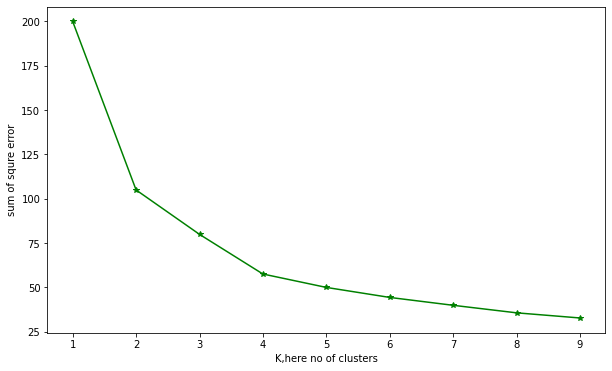

In [275]:
plt.figure(figsize=(10,6))
plt.xlabel('K,here no of clusters')
plt. ylabel('sum of squre error')
plt.plot(cluster_range,wss,'g*-')
plt.show()

The elbow appear to be smoothening out after four clusters indicating that the optimal number of clusters is **4**.

In [276]:
# Bulding the model by considering K = 4
clusters_kmeans_4 = KMeans(4,random_state=42)
clusters_kmeans_4 = clusters_kmeans_4.fit(crime_std)
clusters_kmeans_4.labels_

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0], dtype=int32)

In [277]:
#These are standardized values.
clusters_kmeans_4.cluster_centers_

array([[-0.49, -0.39,  0.58, -0.26],
       [ 1.43,  0.88, -0.82,  0.02],
       [ 0.7 ,  1.05,  0.73,  1.29],
       [-0.97, -1.12, -0.94, -0.98]])

In [278]:
crime["KMeans_4"] = clusters_kmeans_4.labels_
crime.head()

,Murder,Assault,UrbanPop,Rape,KMeans_4
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,2
2,8.1,294,80,31.0,2
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,2


In [279]:
crime.groupby("KMeans_4").agg(["mean"])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
KMeans_4,,,,
0,5.656250,138.875000,73.875000,18.781250
1,13.937500,243.625000,53.750000,21.412500
2,10.815385,257.384615,76.000000,33.192308
3,3.600000,78.538462,52.076923,12.176923


Cluster 3: stands out for minimum crime rate as the means of 3 crimes are least relative to other crimes
Cluster 4: As per summary we can say Cluster 4 have the higher rate of crime.

In [280]:
import seaborn as sns

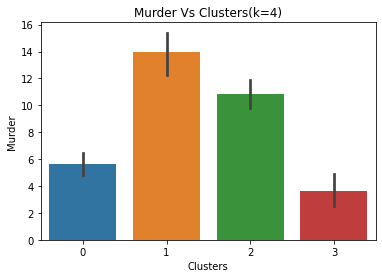

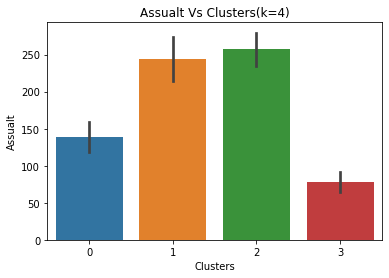

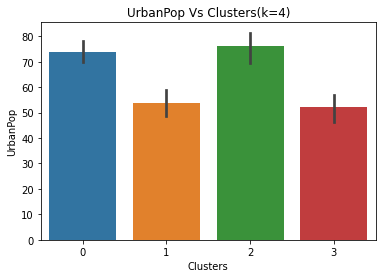

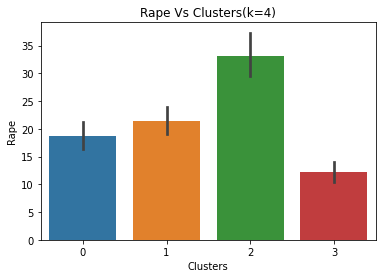

In [281]:
for i in range(0,4):
    # plt.grid( )
    sns.barplot(y=crime.iloc[:,i] ,x=crime["KMeans_4"])
    plt.xlabel("Clusters")
    plt.ylabel(crime_std.columns[i])
    plt.title(f"{crime_std.columns[i]} Vs Clusters(k=4)")
    plt.show()

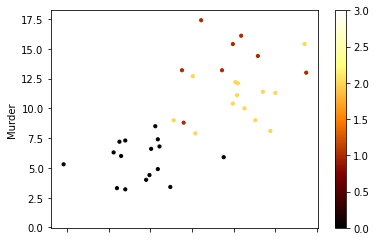

In [282]:
import matplotlib.pylab as plt 
crime.plot(x="Assault", y="Murder", c=clusters_kmeans_4.labels_,kind="scatter",s=10,cmap=plt.cm.afmhot)

The above scatter shows a distribution of how the states are scattered and clusters are visible based on Murders and Assaults.

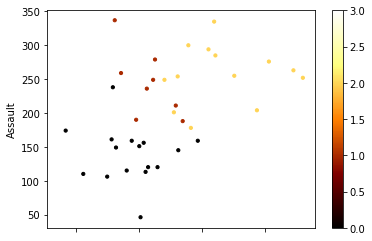

In [283]:
crime.plot(x="Rape", y="Assault", c=clusters_kmeans_4.labels_,kind="scatter",s=10,cmap=plt.cm.afmhot)

The above scatter shows a distribution of how the states are scattered and clusters are visible based on Rape and Assaults.

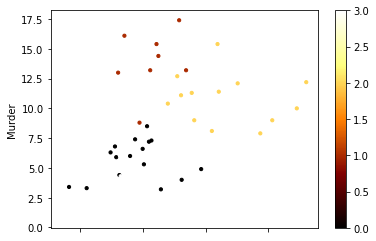

In [284]:
crime.plot(x="Rape", y="Murder", c=clusters_kmeans_4.labels_,kind="scatter",s=10,cmap=plt.cm.afmhot)

The above scatter shows a distribution of how the states are scattered and clusters are visible based on Murders and Rape.

In [285]:
from sklearn.metrics import accuracy_score

In [286]:
new_data=pd.DataFrame({'Murder':12.25,"Assault":148.256,"UrbanPop":75.00,"Rape":24.67},index=[0])
new_data

,Murder,Assault,UrbanPop,Rape
0,12.25,148.256,75.0,24.67


In [287]:
 clusters_kmeans_4.predict(new_data)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Assault
Feature names seen at fit time, yet now missing:
- Assualt

  warnings.warn(message, FutureWarning)


array([2], dtype=int32)

**Hirarchical Clustering**

In [288]:
import scipy.cluster.hierarchy as sch
crime.head()

,Murder,Assault,UrbanPop,Rape,KMeans_4
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,2
2,8.1,294,80,31.0,2
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,2


In [289]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
array=crime.values
scalar=MinMaxScaler(feature_range=(0,1))
rescaledX=scalar.fit_transform(array[:,0:4])

#transformed data
set_printoptions(precision=2)
print(rescaledX[0:4,:])


[[0.75 0.65 0.44 0.36]
 [0.55 0.75 0.27 0.96]
 [0.44 0.85 0.81 0.61]
 [0.48 0.5  0.31 0.32]]


In [290]:
crime.iloc[:,i]

0     21.2
1     44.5
2     31.0
3     19.5
4     40.6
5     38.7
6     11.1
7     15.8
8     31.9
9     25.8
10    20.2
11    14.2
12    24.0
13    21.0
14    11.3
15    18.0
16    16.3
17    22.2
18     7.8
19    27.8
20    16.3
21    35.1
22    14.9
23    17.1
24    28.2
25    16.4
26    16.5
27    46.0
28     9.5
29    18.8
30    32.1
31    26.1
32    16.1
33     7.3
34    21.4
35    20.0
36    29.3
37    14.9
38     8.3
39    22.5
40    12.8
41    26.9
42    25.5
43    22.9
44    11.2
45    20.7
46    26.2
47     9.3
48    10.8
49    15.6
Name: Rape, dtype: float64

**Single Linkage**

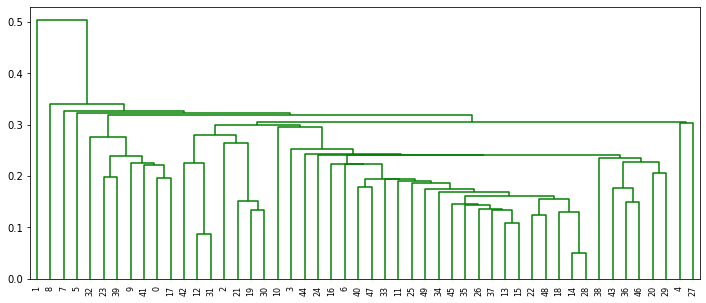

In [291]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
sch.linkage(rescaledX,method="single") 
plt.figure(figsize=(12,5)) 
sch.dendrogram(sch.linkage(rescaledX,method="single"),color_threshold=1)
plt.show()

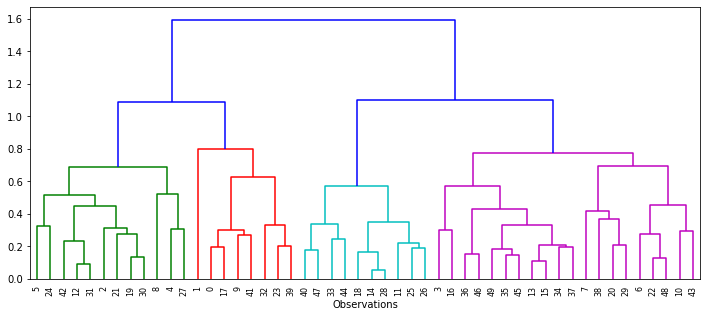

In [292]:
sch.linkage(rescaledX,method="complete") 
plt.figure(figsize=(12,5)) 
sch.dendrogram(sch.linkage(rescaledX,method="complete"),color_threshold=1)
plt.xlabel("Observations")
plt.show()

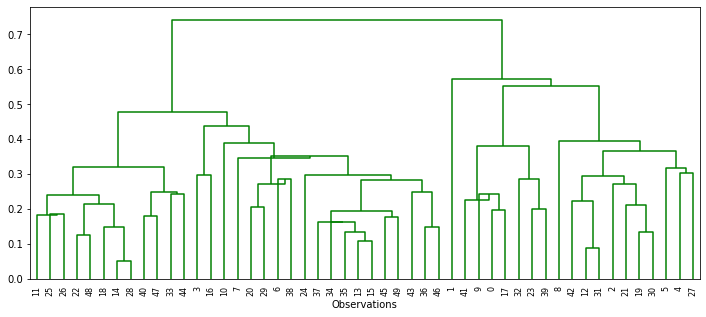

In [293]:
sch.linkage(rescaledX,method="centroid") 
plt.figure(figsize=(12,5)) 
sch.dendrogram(sch.linkage(rescaledX,method="centroid"),color_threshold=1)
plt.xlabel("Observations")
plt.show()

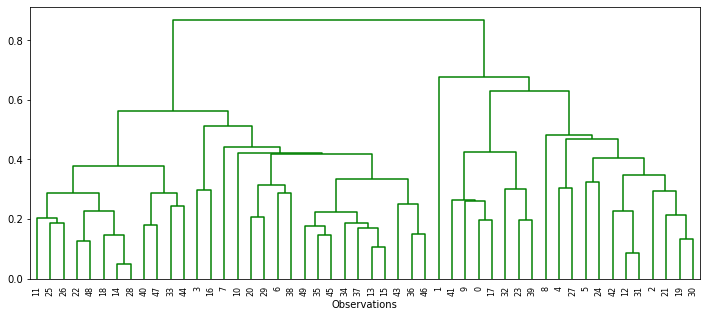

In [294]:
sch.linkage(rescaledX,method="average") 
plt.figure(figsize=(12,5)) 
sch.dendrogram(sch.linkage(rescaledX,method="average"),color_threshold=1)
plt.xlabel("Observations")
plt.show()

In [295]:
#To create Hierarchical clustring
from sklearn.cluster import AgglomerativeClustering
hierar_cluster = AgglomerativeClustering(n_clusters=4, affinity="euclidean",linkage="complete")
hierar_cluster.fit_predict(rescaledX)

array([0, 0, 3, 1, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 1, 0, 2, 3, 1, 3,
       1, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 1, 1])

In [296]:
crime["Hierar_cluster_K(4)"] =hierar_cluster.labels_
crime.head()

,Murder,Assault,UrbanPop,Rape,KMeans_4,Hierar_cluster_K(4)
0,13.2,236,58,21.2,1,0
1,10.0,263,48,44.5,2,0
2,8.1,294,80,31.0,2,3
3,8.8,190,50,19.5,1,1
4,9.0,276,91,40.6,2,3


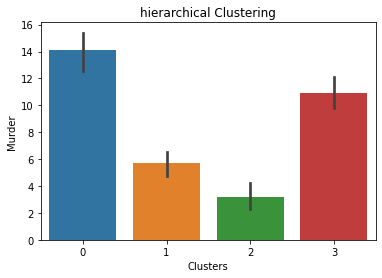

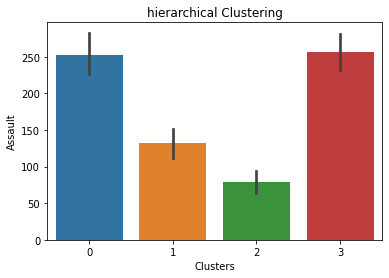

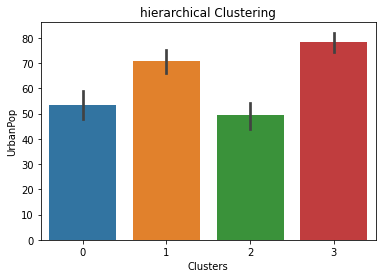

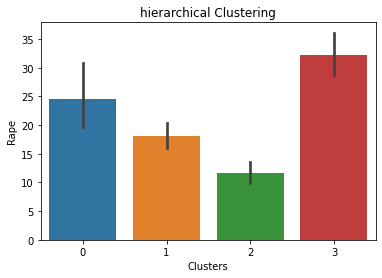

In [297]:
for i in range(0,4):
    sns.barplot(y=crime.iloc[:,i],x=crime["Hierar_cluster_K(4)"])
    plt.xlabel("Clusters")
    plt.ylabel(crime.columns[i])
    plt.title(f"hierarchical Clustering")
    plt.show()

In [298]:
# save clusters for chart
y_hc =hierar_cluster.fit_predict(rescaledX)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [299]:
Clusters.head() 

,Clusters
0,0
1,0
2,3
3,1
4,3


**Sorting Values of Cluster in Ascending Order**

In [300]:
import numpy as np
crime.sort_values("Hierar_cluster_K(4)")["Hierar_cluster_K(4)"].values

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3])

In [301]:
import sklearn.metrics as sm
y_hc=hierar_cluster.fit_predict(rescaledX)
sm.accuracy_score(y_hc,Clusters)

1.0

**DBSCAN Clustering**

In [302]:
#Scaling the data by normalizing 
def normalize(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

crime_data_nor = normalize(crime.iloc[:,:4])
crime_data_nor

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [303]:
crime_data_nor.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [304]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.2,min_samples=3)
dbscan.fit(crime_data_nor)
# dbscan.fit_predict(crime_data_nor)

DBSCAN(eps=0.2, min_samples=3)

In [305]:
#Noisy samples are given the label -1.
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0,  0,  0, -1,
       -1,  0,  1, -1,  1,  0, -1, -1,  0,  0, -1,  0, -1,  1, -1, -1,  0,
        0,  0,  2,  0, -1, -1,  0, -1, -1,  2, -1,  0,  2,  0,  0,  0])

In [306]:
crime["DBSCAN"] = dbscan.labels_
crime.head()

,Murder,Assault,UrbanPop,Rape,KMeans_4,Hierar_cluster_K(4),DBSCAN
0,13.2,236,58,21.2,1,0,-1
1,10.0,263,48,44.5,2,0,-1
2,8.1,294,80,31.0,2,3,-1
3,8.8,190,50,19.5,1,1,-1
4,9.0,276,91,40.6,2,3,-1


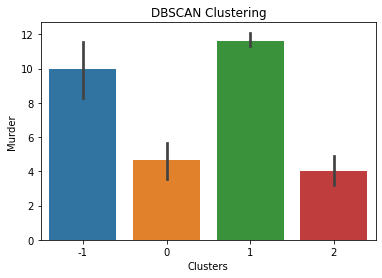

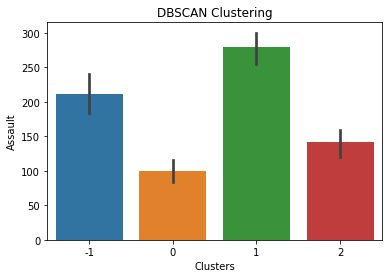

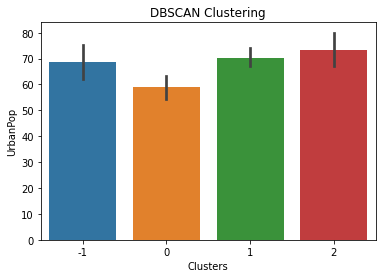

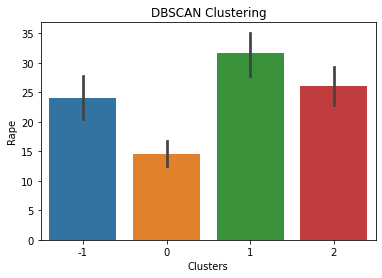

In [307]:
for i in range(0,4):
    sns.barplot(y=crime.iloc[:,i],x=crime["DBSCAN"])
    plt.xlabel("Clusters")
    plt.ylabel(crime.columns[i])
    plt.title(f"DBSCAN Clustering")
    plt.show()

In [308]:
crime.value_counts()

Murder  Assault  UrbanPop  Rape  KMeans_4  Hierar_cluster_K(4)  DBSCAN
17.4    211      60        25.8  1         0                    -1        1
4.0     145      73        26.2  0         1                     2        1
6.6     151      68        20.0  0         1                     0        1
6.3     106      72        14.9  0         1                     0        1
6.0     115      66        18.0  0         1                     0        1
        109      53        16.4  3         2                     0        1
5.9     238      72        15.8  0         1                    -1        1
5.7     81       39        9.3   3         2                     0        1
5.3     46       83        20.2  0         1                    -1        1
4.9     159      67        29.3  0         1                     2        1
4.4     149      85        16.3  0         1                    -1        1
4.3     102      62        16.5  3         2                     0        1
3.8     86       

In [309]:
crime.to_csv("clustred.csv")

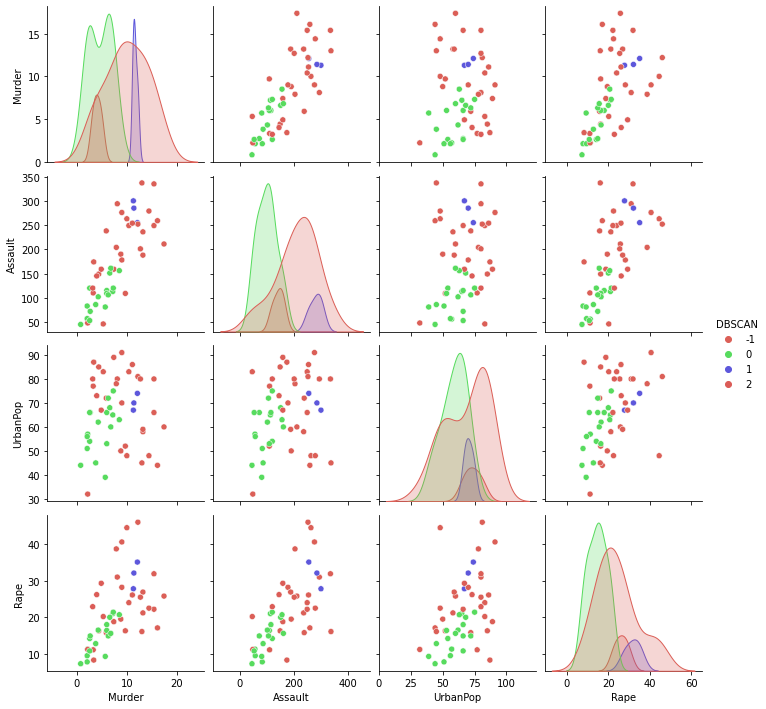

In [310]:
sns.color_palette("hls", 8)
sns.pairplot(crime.drop(columns=["KMeans_4","Hierar_cluster_K(4)"]),palette="hls",hue="DBSCAN",)

In [ ]:
sns.pairplot(crime)